# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

\begin{equation}
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [11]:
# Sample data 를 이용해 Classification 을 진행해보자. 
samples = 1000
x, y = make_classification(n_samples=samples, n_features=2, 
                           n_informative=2, # 독립변수 중 종속변수와 상관관계가 있는 성분의 수
                           n_redundant=0, # 노이즈 개수
                           n_clusters_per_class=1) # 클래스당 클러스터의 개수 예) class 0 는 2개의 cluster로 분리된다

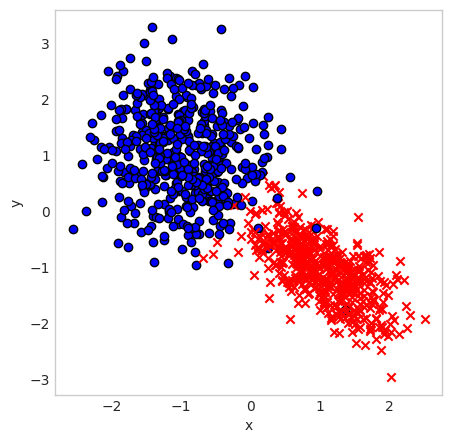

In [12]:
fig, ax = plt.subplots(1, 1 , figsize = (5,5))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

for i in range(samples):
  if y[i] == 0:
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'x', color = 'r')
  else:
    ax.scatter(x[i, 0], x[i, 1], edgecolors = 'k', marker = 'o', color = 'b')

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
print(f'Train Data Score : {model.score(x_train, y_train)}')
print(f'Test Data Score : {model.score(x_test, y_test)}')

Train Data Score : 0.98375
Test Data Score : 0.97


In [16]:
# model 정확도 평가 
scores = cross_val_score(model, x, y, cv = 10, scoring = 'accuracy')
print(f'CV mean score: {scores.mean()}')

CV mean score: 0.982


In [18]:
model.intercept_, model.coef_

(array([0.17627002]), array([[-3.776927  ,  2.86598269]]))

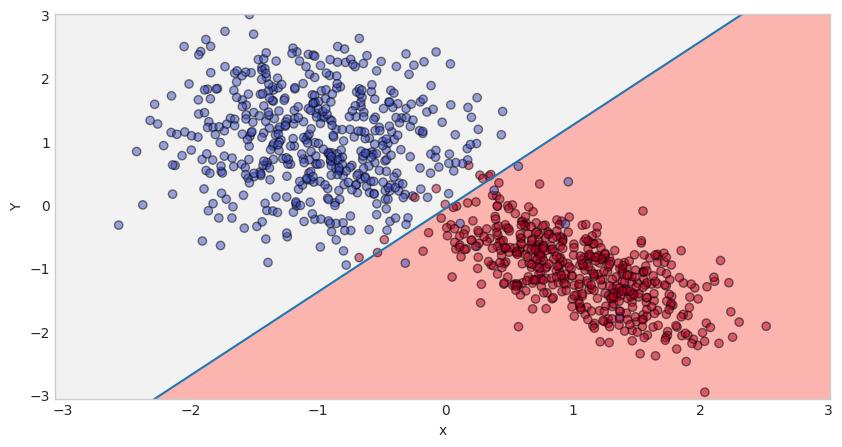

In [25]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5 
y_min, y_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # 격자 데이터 생성
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel(): 다차원을 1차원으로 해체

# Test data를 이용한 분류 
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# train data plot에 출력
plt.scatter(x[:, 0], x[:, 1], c=np.abs(y -1), edgecolors='k', alpha = .5, cmap=plt.cm.coolwarm)
plt.xlabel('x')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

# 분류 직선 
w_0 = model.intercept_[0]
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]
x_lin = np.linspace(x_min, x_max)
y_lin = -(w_1/w_2)*x_lin  - (w_0/w_2)

plt.plot(x_lin, y_lin)

plt.show()

## 붓꽃 데이터

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

![iris.png](https://lh3.googleusercontent.com/u/1/drive-viewer/AFDK6gOWy-9_2iDaquH9XyhlErETdBXTnirMlrg8W4EjMJTFw_89d6c5kAu_jY_jaVidWC5Ux5zWt0xRJ59NhnVRtOnR46BzEQ=w3840-h1981)

In [28]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [32]:
# 학습시켜야 하는 target data 
# 0, 1, 2 분류만 잘하면 된다. 
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
# [0,1,2] -> ['setosa', 'versicolor', 'virginica'] 로 변경
# pairplot 과 같은 차트를 통해 feature의 관계를 확인하기 위해서
species = pd.Series((iris.target), dtype = 'category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [36]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
iris_df.describe()
#  통계량 확인 및 이상치 확인 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Box plot 
- Median: 데이터의 중앙값
- 1사 분위(Q1): Median 을 기준으로 하위 25% 지점
- 3사 분위(Q3): Median 을 기준으로 상위 25% 지점
- Interquartile range (IQR)(상자길이) : Q3 - Q1
- Lower and upper 1.5*IQR whiskers(수염)
- Outliers(이상점):  Q1 − 1.5 IQR 또는 Q3 + 1.5 IQR 밖에 위치하는 데이터


![image.png](https://help.ezbiocloud.net/wp-content/uploads/2020/04/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA-2020-04-19-%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB-9.41.35.png)

In [42]:
# https://medium.com/@Aaron__Kim/outlier-모두-제거해야할까-3aec52ef21b1

<AxesSubplot: >

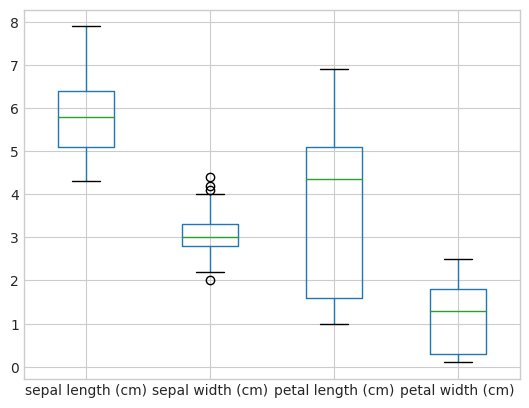

In [39]:
iris_df.boxplot()

<AxesSubplot: >

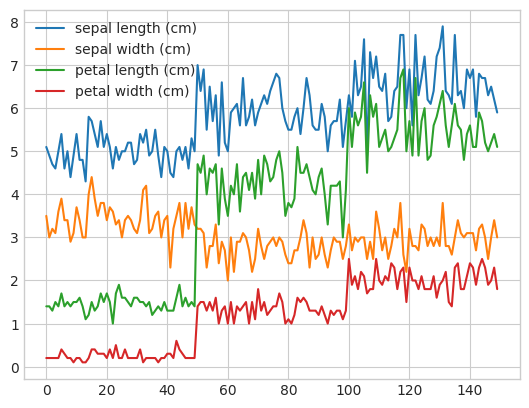

In [40]:
iris_df.plot()

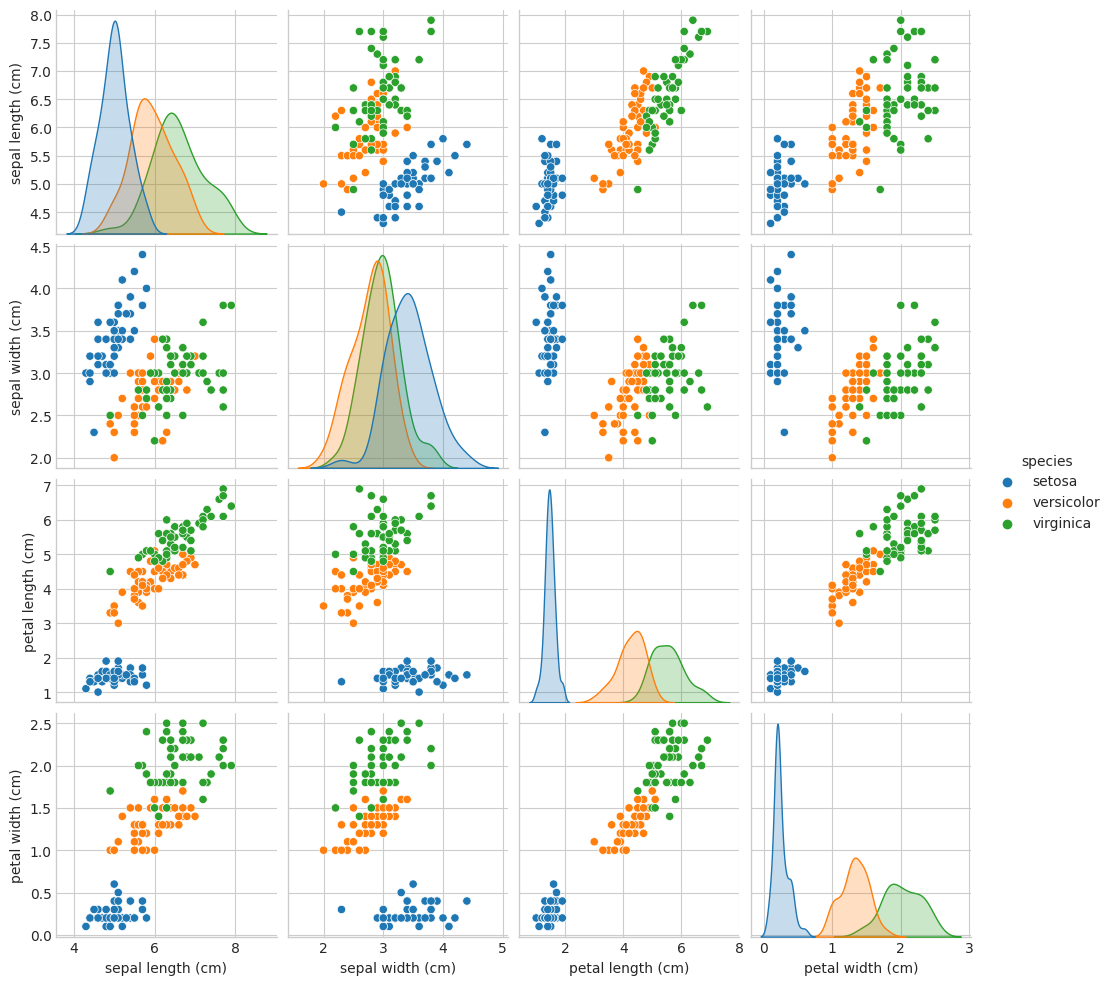

In [41]:
import seaborn as sns

sns.pairplot(iris_df, hue='species')

## 붓꽃 데이터에 대한 로지스틱 회귀

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, 
                                                    test_size=0.2, random_state=1,stratify = iris.target)
# stratify :  stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / test 유지 
# 한 쪽에 쏠려서 분배되는 것을 방지 

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', # 최적화에 사용할 알고리즘 설정
                           multi_class='auto', 
                           C=100, # 규칙의 강도의 역수 값(높은 C를 설정할수록, 낮은 강도의 제약조건, 강한 규제)
                           random_state=1)
model.fit(x_train, y_train)

LogisticRegression(C=100, random_state=1)

### solver
- optimization에 사용되는 algorithm의 종류. 
    - {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'} (default: 'lbfgs')
- 작은 dataset의 경우 'liblinear'이 좋은 선택일 수 있으며, 'sag'과 'saga'는 큰 dataset에서 더욱 빠르게 동작한다.
- Multiclass problem의 경우, 'newton-cg', 'sag', 'saga', 'lbfgs'만이 multinomial loss를 다룰 수 있다.
- 'liblinear'은 one-versus-rest scheme에서만 동작한다.
- 각 solver가 지원하는 penalty의 종류
    - 'newton-cg': 'l2', 'none'
    - 'lbfgs': 'l2', 'none'
    - 'liblinear': 'l1', 'l2'
    - 'sag': 'l2', 'none'
    - 'saga': 'elasticnet', 'l1', 'l2', 'none'

In [54]:
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9666666666666667
Test Data Score: 0.9666666666666667


In [55]:
import numpy as np
x = np.vstack((x_train, x_test))
y = np.hstack((y_train, y_test))

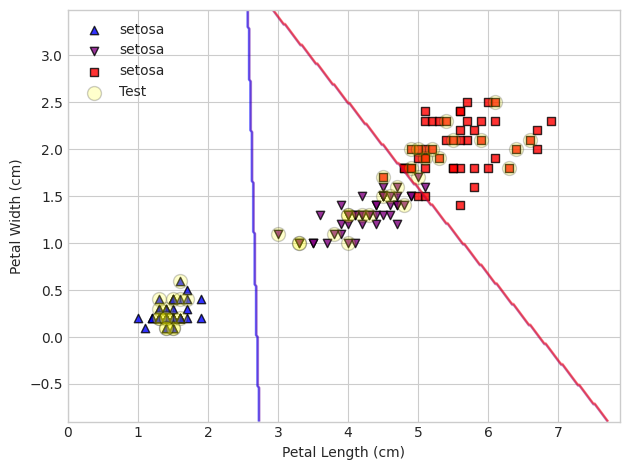

In [60]:
from matplotlib.colors import ListedColormap


# 격자를 이용한 분류 직선 표시
x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, .02),
                       np.arange(x2_min, x2_max, .02))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

specise = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contour(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# 실제 train dataset
for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1],
              alpha = 0.8, c=colors[idx],
              marker=markers[idx], label=species[cl],
              edgecolor='k')

# test Set
x_comb_test, y_comb_test = x[range(105, 150), :], y[range(105, 150)]
plt.scatter(x_comb_test[:, 0], x_comb_test[:, 1],
            c='yellow', edgecolor = 'k', alpha=0.2,
            linewidth=1, marker='o', 
            s=100, label='Test')
  
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.tight_layout();

In [61]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : [2, 2.2, 2.4, 2.6, 2.8]}]

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                  scoring = 'accuracy', cv = 10, n_jobs = multiprocessing.cpu_count())
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=12,
             param_grid=[{'C': [2, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [62]:
result = gs.fit(iris.data, iris.target)

/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/c/Users/banya/Desktop/lab/pandas/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [63]:
print(gs.best_estimator_)
print('Best Score: {}'.format(gs.best_score_))
print('Best Parameter: {}'.format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
Best Score: 0.9800000000000001
Best Parameter: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000725,0.000327,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.027381,0.008035,0.001041,0.000496,2,l2,"{'C': 2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.001130,0.001218,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,0.034328,0.007435,0.000756,0.000218,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000541,0.000090,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.030560,0.004778,0.001199,0.000504,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000564,0.000236,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,0.029729,0.003523,0.000878,0.000615,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000594,0.000205,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
9,0.029476,0.004099,0.000712,0.000149,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

In [27]:
from sklearn.datasets import load_breast_cancer

In [28]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

In [29]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [30]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


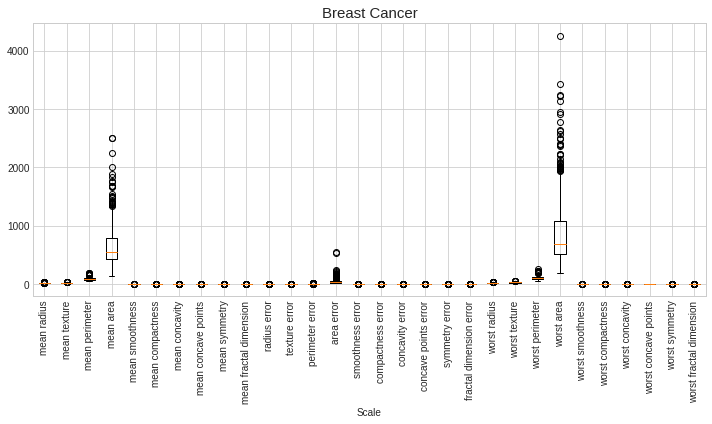

In [31]:
fig, plt.figure(figsize=[10, 6])
plt.title('Breast Cancer', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90) # 수치형 변수 개수 넣음
plt.xlabel('Scale')
plt.tight_layout()

## 유방암 데이터에 대한 로지스틱 회귀